In [2]:
import matplotlib.pyplot as plt
import matplotlib

import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import math as m
import scipy.optimize as opt
import statistics as st

matplotlib.rcParams['figure.figsize'] = (15, 7)


In [3]:
hill_data = fits.getdata('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits', ext = 0)
var_Q_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_Q.fits', ext = 0)
var_U_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_U.fits', ext = 0)
ang_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits', ext=0)
I_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits', ext=0)
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0)
Q_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits', ext=0)
S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
s2n_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits', ext = 0)
U_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits', ext = 0)
var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0)

# S-corrected p for entire cloud

In [4]:
mask = np.logical_and(hill_data>0, polint_data>3*np.sqrt(var_polint_data))
s = S_data[np.logical_not(np.isnan(S_data))]
s_median = np.logical_and(S_data<st.median(s), mask)

i_good = mask.nonzero()
p_good = p_data[i_good]
s_good = p_data[s_median]

<ipython-input-5-478188562de8>:5: RuntimeWarning: invalid value encountered in arccos
  gammas = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good]
<ipython-input-5-478188562de8>:6: RuntimeWarning: invalid value encountered in arccos
  gammap = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]


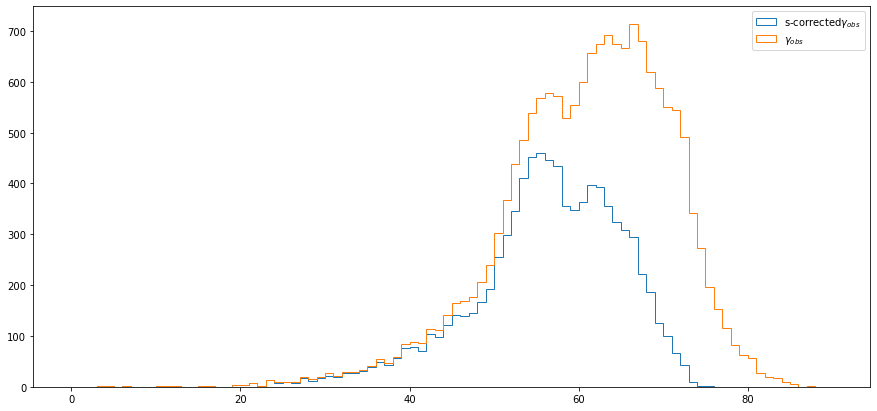

In [5]:
plt.figure(figsize = (15, 7))

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gammas = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good]
gammap = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]

hists, bins, patches = plt.hist(gammas, 90, range= (0,90), histtype = 'step', label = 's-corrected$\gamma_{obs}$')
histp, bins, patches = plt.hist(gammap, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$')

plt.legend()

### Misc 

In [6]:
mask2 = np.logical_and(hill_data==2, polint_data>3*np.sqrt(var_polint_data))
mask3 = np.logical_and(hill_data==3, polint_data>3*np.sqrt(var_polint_data))
mask4 = np.logical_and(hill_data==4, polint_data>3*np.sqrt(var_polint_data))
mask5 = np.logical_and(hill_data==5, polint_data>3*np.sqrt(var_polint_data))

# S-corrected for S mean of each subregion

# 1 Center-Ridge 

6.317666119975689

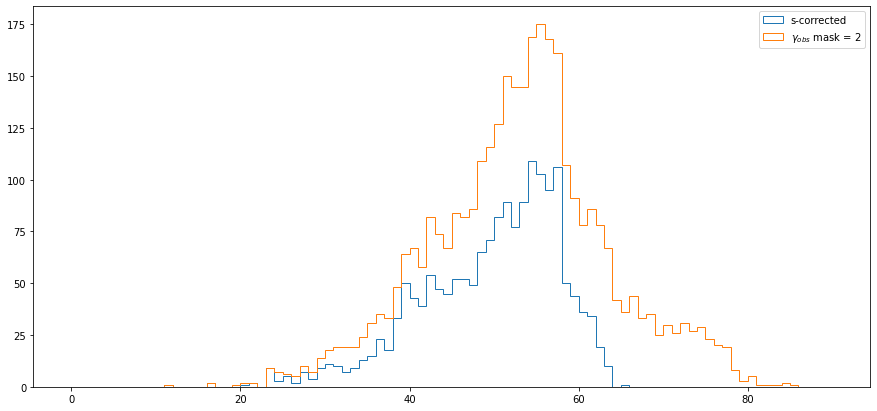

In [9]:
plt.figure(figsize = (15, 7))

s2 = S_data[mask2]
s_median2 = np.logical_and(S_data<st.median(s2), mask2)
s_good2 = p_data[s_median2]
gammas2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good2]
hists2, bins, patches = plt.hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good2 = mask2.nonzero()
p_good2 = p_data[i_good2]
gamma2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good2]
hist2, bins, patches = plt.hist(gamma2, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$ mask = 2')
plt.legend()

st.median(s2)

# 2 Center-Nest

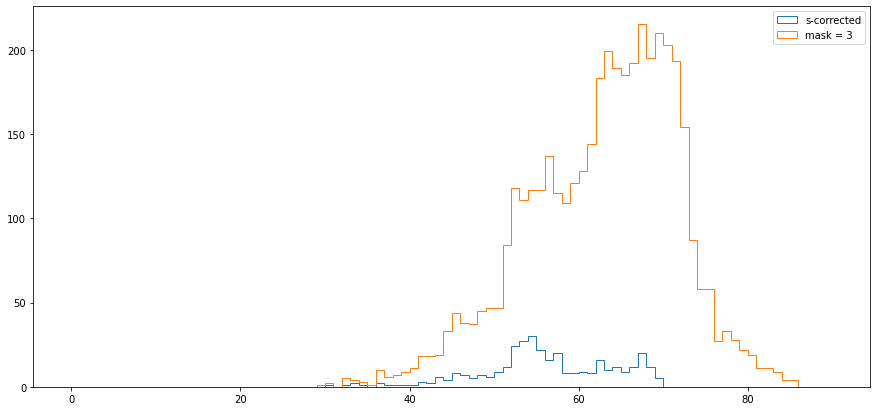

In [10]:
plt.figure(figsize = (15, 7))

s3 = S_data[mask3]

s_median3 = np.logical_and(S_data<st.median(s3), mask3)
s_good3 = p_data[s_median3]
gammas3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good3]
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good3 = mask3.nonzero()
p_good3 = p_data[i_good3]
gamma3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good3]
hist3, bins, patches = plt.hist(gamma3, 90, range= (0,90), histtype = 'step', label = 'mask = 3')
plt.legend()

# 3 South-Ridge

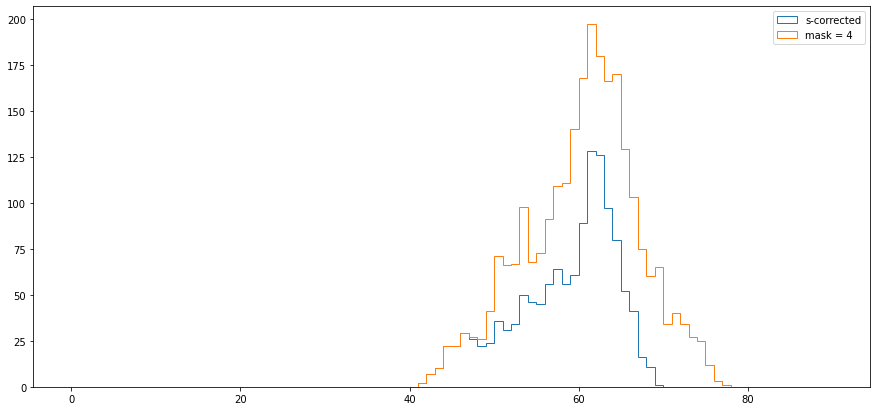

In [13]:
plt.figure(figsize = (15, 7))

s4 = S_data[mask4]
s_median4 = np.logical_and(mask4, S_data<st.median(s4))
s_good4 = p_data[s_median4]
gammas4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good4]
hists4, bins, patches = plt.hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good4 = mask4.nonzero()
p_good4 = p_data[i_good4]
gamma4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good4]
hist4, bins, patches = plt.hist(gamma4, 90, range= (0,90), histtype = 'step', label = 'mask = 4')
plt.legend()

# 4 South-Nest

<ipython-input-14-b1dd8ec7f937>:6: RuntimeWarning: invalid value encountered in arccos
  gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
<ipython-input-14-b1dd8ec7f937>:11: RuntimeWarning: invalid value encountered in arccos
  gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]


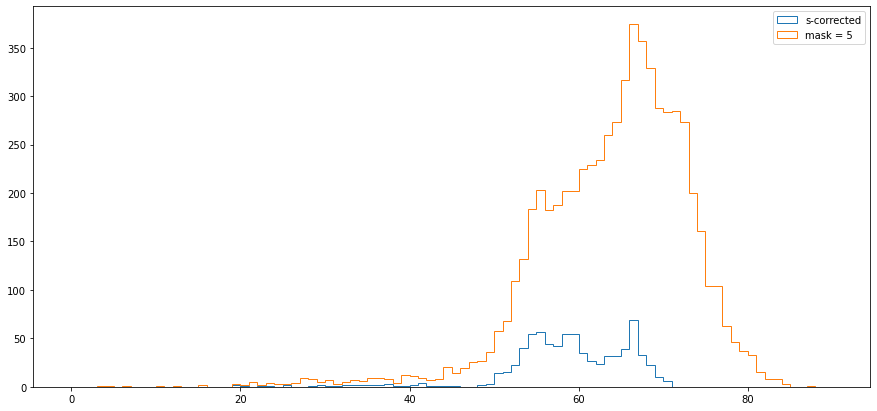

In [14]:
plt.figure(figsize = (15, 7))

s5 = S_data[mask5]
s_median5 = np.logical_and(S_data<st.median(s5), mask5)
s_good5 = p_data[s_median5]
gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
hists5, bins, patches = plt.hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good5 = mask5.nonzero()
p_good5 = p_data[i_good5]
gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]
hist5, bins, patches = plt.hist(gamma5, 90, range= (0,90), histtype = 'step', label = 'mask = 5')
plt.legend()

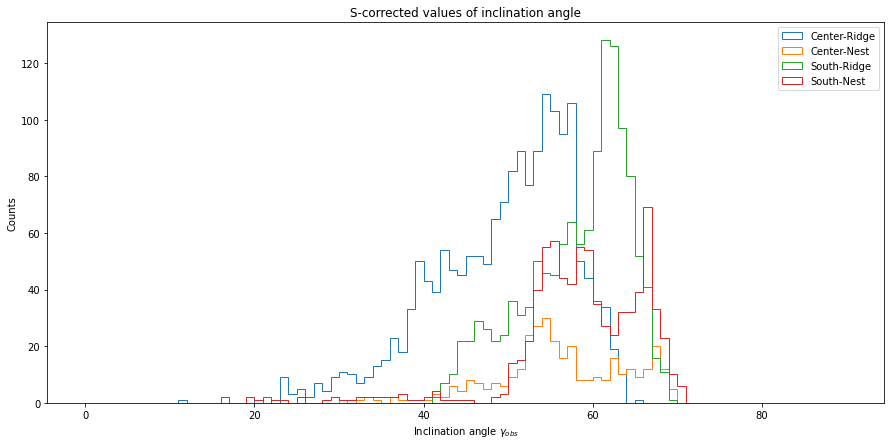

In [15]:
hists2, bins, patches = plt.hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 'Center-Ridge')
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 'Center-Nest')
hists4, bins, patches = plt.hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 'South-Ridge')
hists5, bins, patches = plt.hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 'South-Nest')
plt.xlabel('Inclination angle $\gamma_{obs}$')
plt.ylabel('Counts')
plt.title('S-corrected values of inclination angle')
plt.legend()